In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
survey_df = pd.read_csv(r"C:\Users\Omen\Documents\python for Data Engineer\survey_results_public.csv")
survey_df


In [ ]:
survey_df.columns

In [ ]:
survey_schema_df = pd.read_csv(r"C:\Users\Omen\Documents\python for Data Engineer\survey_results_schema.csv")
survey_schema_df


In [ ]:
schema_raw= pd.read_csv(r"C:\Users\Omen\Documents\python for Data Engineer\survey_results_schema.csv", index_col="Column").QuestionText
schema_raw

In [ ]:
schema_raw["YearsCodePro"]

Data Preparation and Cleaning

In [ ]:
survey_df.columns

In [8]:
selected_columns=[
    "Country",
    "Age",
    "Gender",
    "EdLevel",
    "UndergradMajor",
    #Programing experience
    "Hobbyist",
    "Age1stCode",
    "YearsCode",
    "YearsCodePro",
    "LanguageWorkedWith",
    "LanguageDesireNextYear",
    "NEWLearn",
    "NEWStuck",
    #Employment
    "Employment",
    "DevType",
    "WorkWeekHrs",
    "JobSat",
    "JobFactors",
    "NEWOvertime",
    "NEWEdImpt"
]

In [ ]:
len(selected_columns)

In [ ]:
survey_copy_df=survey_df[selected_columns].copy()
survey_copy_df

In [ ]:
schema_copy =schema_raw[selected_columns]
schema_copy

In [ ]:
survey_copy_df.shape

In [ ]:
survey_copy_df.info()

In [ ]:
schema_copy.Age1stCode

In [ ]:
survey_copy_df.Age1stCode.unique()

In [16]:
survey_copy_df["Age1sfCode"]=pd.to_numeric(survey_copy_df.Age1stCode, errors="coerce")
survey_copy_df["YearsCOde"]=pd.to_numeric(survey_copy_df.YearsCode, errors="coerce")
survey_copy_df["YearsCodePro"]=pd.to_numeric(survey_copy_df.YearsCodePro, errors="coerce")


In [ ]:
survey_copy_df.describe()

there seems to be a problem with the age column, as the min value is 1 and the max value is 279. So, we will drop rows that has age younger than 10 and older than 100.

In [18]:
survey_copy_df.drop(survey_copy_df[survey_copy_df.Age<10].index, inplace=True)
survey_copy_df.drop(survey_copy_df[survey_copy_df.Age>100].index, inplace=True) 

The same hold true for WorkWeekHrs. Let's ignore enteries where the value for the column is highr than 140 hours. (~20 hours per day)

In [19]:
survey_copy_df.drop(survey_copy_df[survey_copy_df.WorkWeekHrs>140].index, inplace=True)

In [ ]:
survey_copy_df.Gender.value_counts()

In [21]:
survey_copy_df.where(~(survey_copy_df.Gender.str.contains(";", na=False)), np.nan, inplace=True)

In [ ]:
survey_copy_df.Gender.value_counts()

In [ ]:
survey_copy_df.sample(10)

Exploratory Analysis and Visualization

In [24]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"]=14
matplotlib.rcParams["figure.figsize"]=(9,5)
matplotlib.rcParams["figure.facecolor"]="#00000000"

Country

In [ ]:
schema_copy.Country

In [ ]:
survey_copy_df.Country.unique()

In [ ]:
top_countries=survey_copy_df.Country.value_counts().head(15)
top_countries

In [ ]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title(schema_copy.Country)
sns.barplot(x=top_countries.index, y=top_countries);

Age

In [ ]:
plt.figure(figsize=(12, 6))
plt.title(schema_copy.Age)
plt.xlabel("Age")
plt.ylabel("Number of Response")
plt.hist(survey_copy_df.Age, bins=np.arange(10, 100, 5), color="purple")

Gender

In [ ]:
schema_copy.Gender

In [ ]:
gender_counts = survey_copy_df.Gender.value_counts()
gender_counts

In [ ]:
plt.figure(figsize=(15, 12))
plt.title(schema_copy.Gender)
plt.legend(["Man", "Woman", "NonBinary"])
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90);

Education Level

In [ ]:
plt.figure(figsize=(15, 12))
sns.countplot(y=survey_copy_df.EdLevel)

sns.set_palette("coolwarm")
plt.xticks(rotation=90)
plt.title(schema_copy["EdLevel"])
plt.ylabel(None)

Plotting undergraduate majors, by converting the number into percentage, then sorting by percentage values to make it easier to visualize the data.

In [ ]:
schema_copy.UndergradMajor

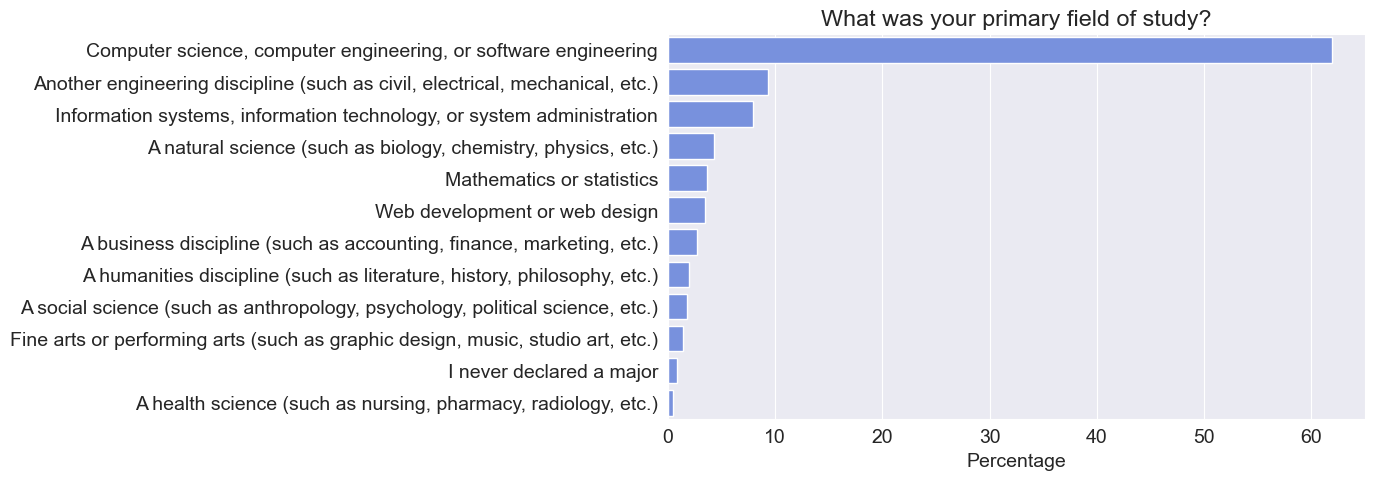

In [41]:
undergrad_pct= survey_copy_df.UndergradMajor.value_counts()*100/survey_copy_df.UndergradMajor.count();
sns.barplot(x=undergrad_pct, y=undergrad_pct.index)


plt.title(schema_copy.UndergradMajor)
plt.ylabel(None)
plt.xlabel("Percentage");

Employment

In [42]:
schema_copy.Employment

'Which of the following best describes your current employment status?'

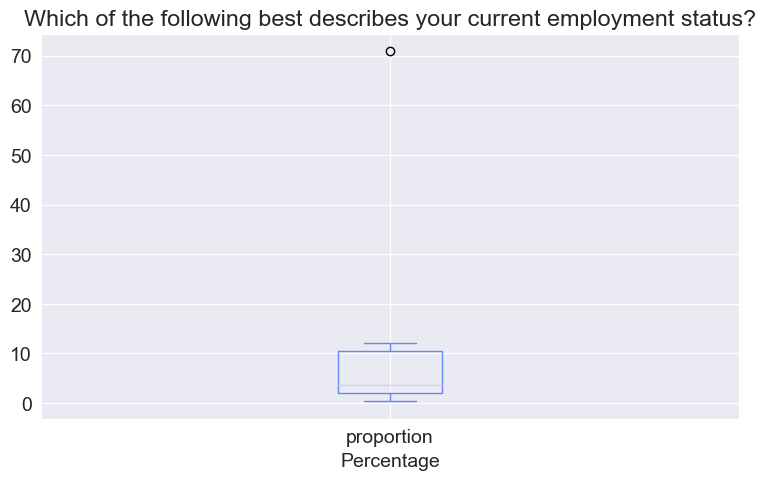

In [47]:
(survey_copy_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind= "area")
plt.title(schema_copy.Employment)
plt.xlabel("Percentage");